# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

# Differences with Paper

2. The paper uses data from 2010-2012 which are a little outdated. They also use 17 features. We will use data from 2018-2022 experimenting with  different set of features.  Also our dataset
   is significantly larger


In [16]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [30]:
zip_file_path = 'Netherlands_data_prototype.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [31]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [32]:
warnings.filterwarnings("ignore")

In [33]:
df

,OPID,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,...,Maand,Weekdag,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,KRvm
0,5.583410e+10,1,1,1,42,1,3,1,1,0,...,1,7,0,0,4,1,1,60,15,1
1,5.583410e+10,1,1,1,42,1,3,1,1,0,...,1,7,0,0,4,1,1,60,10,1
2,5.583410e+10,1,1,1,42,1,3,1,1,0,...,1,7,0,0,6,1,1,10,5,5
3,5.583410e+10,1,1,1,42,1,3,1,1,0,...,1,7,0,0,6,1,1,10,5,5
4,5.583410e+10,2,2,1,42,1,3,1,1,0,...,1,6,0,0,4,1,1,30,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3.100000e+11,3,6,2,49,3,4,1,1,0,...,12,5,0,0,5,8,8,110,35,1
817122,3.100000e+11,3,6,2,49,3,4,1,1,0,...,12,5,0,0,4,8,8,11,7,6
817123,3.100000e+11,3,6,2,49,3,4,1,1,0,...,12,5,0,0,4,8,8,6,5,6
817124,3.100000e+11,3,6,2,49,3,4,1,1,0,...,12,5,0,0,7,8,8,63,15,1


In [34]:
df = df.drop("OPID", axis=1)
df

,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,...,Maand,Weekdag,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,KRvm
0,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,4,1,1,60,15,1
1,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,4,1,1,60,10,1
2,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,6,1,1,10,5,5
3,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,6,1,1,10,5,5
4,2,2,1,42,1,3,1,1,0,0,...,1,6,0,0,4,1,1,30,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,5,8,8,110,35,1
817122,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,4,8,8,11,7,6
817123,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,4,8,8,6,5,6
817124,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,7,8,8,63,15,1


In [35]:
print(df.columns)

Index(['HHPers', 'HHSam', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Jaar', 'Maand',
       'Weekdag', 'Feestdag', 'Toer', 'KMotiefV', 'VertProv', 'AankProv',
       'AfstR', 'RReisduur', 'KRvm'],
      dtype='object')


In [36]:
new_columns= {"HHPers": "People_in_house", "HHSam": "Household_composition", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
               "Feestdag": "Holiday","Toer": "Round_trip", "KMotiefV": "Motive", "VertProv": "Departure_area", "AankProv": "Arrival_area",
              "AfstR": "Distance", "RReisduur": "Duration", "KRvm": "Mode"}

In [37]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Mode
0,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,4,1,1,60,15,1
1,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,4,1,1,60,10,1
2,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,6,1,1,10,5,5
3,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,6,1,1,10,5,5
4,2,2,1,42,1,3,1,1,0,0,...,1,6,0,0,4,1,1,30,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,5,8,8,110,35,1
817122,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,4,8,8,11,7,6
817123,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,4,8,8,6,5,6
817124,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,7,8,8,63,15,1


# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Household_composition - eg Parents + child or Single parents - Categorical - Nominal
3) Gender - Male / Female - Categorical - Binary
4) Age - Age of the respondent in years - Numeric - Continuous - Integer
5) Background - The citizenship of the respondent (Dutch or other) - Categorical - Nominal
6) Education - Highest education completed for the respondent - Categorical - Nominal
7) Drivel_License - If the respondent has car driving license - Categorical - Binary
8) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
9) Mopeds_in_house - How many mopeds(type of motorcycle) the household has - Numeric - Discrete - Integer
10) Electric_bike - If the respondent has access to an electric bike - Categorical - binary
11) Year - Year that the trip occured - Numeric - Integer
12) Month - Month that the trip occured - Categorical
13) Weekday - Day that the trip occured - Categorical
14) Holiday - If the trip occured on a national holiday - Categorical - Binary
15) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorical - Binary
16) Motive - The reason of the trip - Categorial - Nominal
17) Departure_area - The departure province of the trip - Categorical - Nominal
18) Arrival_area - The arrival province of the trip - Categorical - Nominal
19) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
20) Duration - The duration (In minutes) of the trip - Numeric - Continuous
21) Mode - The mode of transportation for the trip - Categorical - Target variable

In [38]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Mode                     False
dtype: bool

In [39]:
df.duplicated().sum()

161115

In [40]:
df = df.drop_duplicates()

In [41]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Mode
0,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,4,1,1,60,15,1
1,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,4,1,1,60,10,1
2,1,1,1,42,1,3,1,1,0,0,...,1,7,0,0,6,1,1,10,5,5
4,2,2,1,42,1,3,1,1,0,0,...,1,6,0,0,4,1,1,30,10,1
6,2,2,1,42,1,3,1,1,0,0,...,1,6,0,1,8,1,1,10,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817120,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,5,8,8,110,20,1
817121,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,5,8,8,110,35,1
817122,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,4,8,8,11,7,6
817123,3,6,2,49,3,4,1,1,0,0,...,12,5,0,0,4,8,8,6,5,6


In [42]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Mode                     False
dtype: bool

In [43]:
df.duplicated().sum()

0

# Encode variables to categorial so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [44]:
df['Household_composition'].value_counts()

Household_composition
3    292109
2    196796
1    109576
6     43088
4      6567
8      3447
5      2922
7      1506
Name: count, dtype: int64

In [45]:
df['Household_composition'] = df['Household_composition'].map({1:"One person household", 2:"Couple", 3:"Couple and kids",
                                                               4:"Couple, kids and others", 5:"Couple and others", 6:"Single parent and kids",
                                                               7:"Single parents, kids and others", 8:"Other composition"})

In [46]:
df['Gender'].value_counts()

Gender
2    338761
1    317250
Name: count, dtype: int64

In [47]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [48]:
df['Background'].value_counts()

Background
1    519814
3     71816
2     64381
Name: count, dtype: int64

In [49]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Western migration", 3:"Non Western migration"})

In [50]:
df['Education'].value_counts()

Education
4    276334
3    190225
2     81694
7     68171
1     20230
5     13558
0      5799
Name: count, dtype: int64

In [51]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Currently attending"})

In [52]:
df['Driver_license'].value_counts()

Driver_license
1    493008
0    163003
Name: count, dtype: int64

In [53]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [54]:
df['Electric_bike'].value_counts()

Electric_bike
0    464996
1    191015
Name: count, dtype: int64

In [55]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [56]:
df['Month'].value_counts()

Month
9     61021
11    59058
1     58673
10    58292
5     55141
3     54975
6     54200
8     53359
7     51290
12    51174
2     49919
4     48909
Name: count, dtype: int64

In [57]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [58]:
df['Weekday'].value_counts()

Weekday
6    104581
5     99179
3     96798
4     96332
7     94377
2     93885
1     70859
Name: count, dtype: int64

In [59]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [60]:
df['Round_trip'].value_counts()

Round_trip
0    563452
1     92559
Name: count, dtype: int64

In [61]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [62]:
df['Departure_area'].value_counts()

Departure_area
9     162872
8     111611
11     79883
7      76182
6      68900
4      37166
12     35263
2      18834
1      18689
5      17268
3      14786
10     11787
0       2770
Name: count, dtype: int64

In [63]:
df['Departure_area'] = df['Departure_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [64]:
df['Arrival_area'].value_counts()

Arrival_area
9     163233
8     111642
11     79961
7      76383
6      68962
4      37146
12     35256
2      18784
1      18682
5      17242
3      14715
10     11728
0       2277
Name: count, dtype: int64

In [65]:
df['Arrival_area'] = df['Arrival_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [66]:
df['Motive'].value_counts()

Motive
4    129711
7    112783
1    110925
8     75427
9     70562
6     66188
5     51148
3     21246
2     18021
Name: count, dtype: int64

In [67]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [68]:
df['Holiday'].value_counts()

Holiday
0    645262
1     10749
Name: count, dtype: int64

In [69]:
df['Holiday'] = df['Holiday'].map({0: "No", 1: "Yes"})

In [70]:
df['Mode'].value_counts()

Mode
1    218743
5    178556
6    163238
2     69067
4     26407
Name: count, dtype: int64

1 represents car driver and 2 represents car passenger. We will group them into one class : car

In [71]:
df['Mode'] = df['Mode'].map({1:"car", 2:"car", 4:"public transport", 5:"bike", 6:"walk"})

In [72]:
df['Mode'].value_counts()

Mode
car                 287810
bike                178556
walk                163238
public transport     26407
Name: count, dtype: int64

In [73]:
df.shape

(656011, 21)

In [74]:
df.shape

(656011, 21)

In [75]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Mode
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,60,15,car
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,60,10,car
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Saturday,No,No,Visits,Groningen,Groningen,10,5,bike
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Friday,No,No,Shopping/Grocery,Groningen,Groningen,30,10,car
6,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Friday,No,Yes,Tours/hiking,Groningen,Groningen,10,20,walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817120,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Education,North Holland,North Holland,110,20,car
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Education,North Holland,North Holland,110,35,car
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,11,7,walk
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,6,5,walk


# Data Cleaning

In [76]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Distance,Duration
count,656011.000000,656011.000000,656011.000000,656011.000000,656011.000000,656011.000000,656011.000000
mean,2.831736,42.341351,1.374910,0.206754,2020.041387,106.058772,25.948012
std,1.382120,20.601121,1.007505,0.590402,1.443057,213.777004,33.978255
min,1.000000,6.000000,0.000000,0.000000,2018.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,12.000000,10.000000
50%,2.000000,42.000000,1.000000,0.000000,2020.000000,32.000000,15.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,99.000000,30.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,6600.000000,993.000000


The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [77]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [78]:
df = df.drop("Distance", axis=1)

In [79]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Distance_in_kms
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,15,car,6.0
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,10,car,6.0
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Saturday,No,No,Visits,Groningen,Groningen,5,bike,1.0
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Friday,No,No,Shopping/Grocery,Groningen,Groningen,10,car,3.0
6,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,January,Friday,No,Yes,Tours/hiking,Groningen,Groningen,20,walk,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817120,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Education,North Holland,North Holland,20,car,11.0
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Education,North Holland,North Holland,35,car,11.0
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,7,walk,1.1
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,December,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,5,walk,0.6


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656011 entries, 0 to 817124
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   People_in_house        656011 non-null  int64  
 1   Household_composition  656011 non-null  object 
 2   Gender                 656011 non-null  object 
 3   Age                    656011 non-null  int64  
 4   Background             656011 non-null  object 
 5   Education              656011 non-null  object 
 6   Driver_license         656011 non-null  object 
 7   Cars_in_house          656011 non-null  int64  
 8   Mopeds_in_house        656011 non-null  int64  
 9   Electric_bike          656011 non-null  object 
 10  Year                   656011 non-null  int64  
 11  Month                  656011 non-null  object 
 12  Weekday                656011 non-null  object 
 13  Holiday                656011 non-null  object 
 14  Round_trip             656011 non-null  o

In [81]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Distance_in_kms
count,656011.000000,656011.000000,656011.000000,656011.000000,656011.000000,656011.000000,656011.000000
mean,2.831736,42.341351,1.374910,0.206754,2020.041387,25.948012,10.605877
std,1.382120,20.601121,1.007505,0.590402,1.443057,33.978255,21.377700
min,1.000000,6.000000,0.000000,0.000000,2018.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,10.000000,1.200000
50%,2.000000,42.000000,1.000000,0.000000,2020.000000,15.000000,3.200000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,30.000000,9.900000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,993.000000,660.000000


We will also remove samples where Distance and Duration are 0

In [82]:
df = df[(df['Distance_in_kms'] > 0)]

In [83]:
df = df[(df['Duration'] > 0)]

In [84]:
df.shape

(655789, 21)

In [85]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Distance_in_kms
count,655789.000000,655789.000000,655789.000000,655789.000000,655789.000000,655789.000000,655789.000000
mean,2.831879,42.342609,1.374954,0.206778,2020.041518,25.956796,10.609468
std,1.382141,20.602313,1.007377,0.590446,1.443026,33.980651,21.380428
min,1.000000,6.000000,0.000000,0.000000,2018.000000,1.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,10.000000,1.200000
50%,2.000000,42.000000,1.000000,0.000000,2020.000000,15.000000,3.200000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,30.000000,9.900000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,993.000000,660.000000


We will also remove repsondents with age lower than 18 (So to be compatible with the paper. They also removed samples with age under 18).

In [86]:
df = df[(df['Age'] >= 18)]
df.shape

(564931, 21)

In [87]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Distance_in_kms
count,564931.000000,564931.000000,564931.000000,564931.000000,564931.000000,564931.000000,564931.000000
mean,2.609209,47.280799,1.344681,0.204813,2020.067946,26.519161,11.343357
std,1.291121,17.745169,0.991669,0.590059,1.435453,34.400856,22.187050
min,1.000000,18.000000,0.000000,0.000000,2018.000000,1.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,2019.000000,10.000000,1.300000
50%,2.000000,47.000000,1.000000,0.000000,2020.000000,15.000000,3.600000
75%,4.000000,61.000000,2.000000,0.000000,2021.000000,30.000000,10.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,960.000000,660.000000


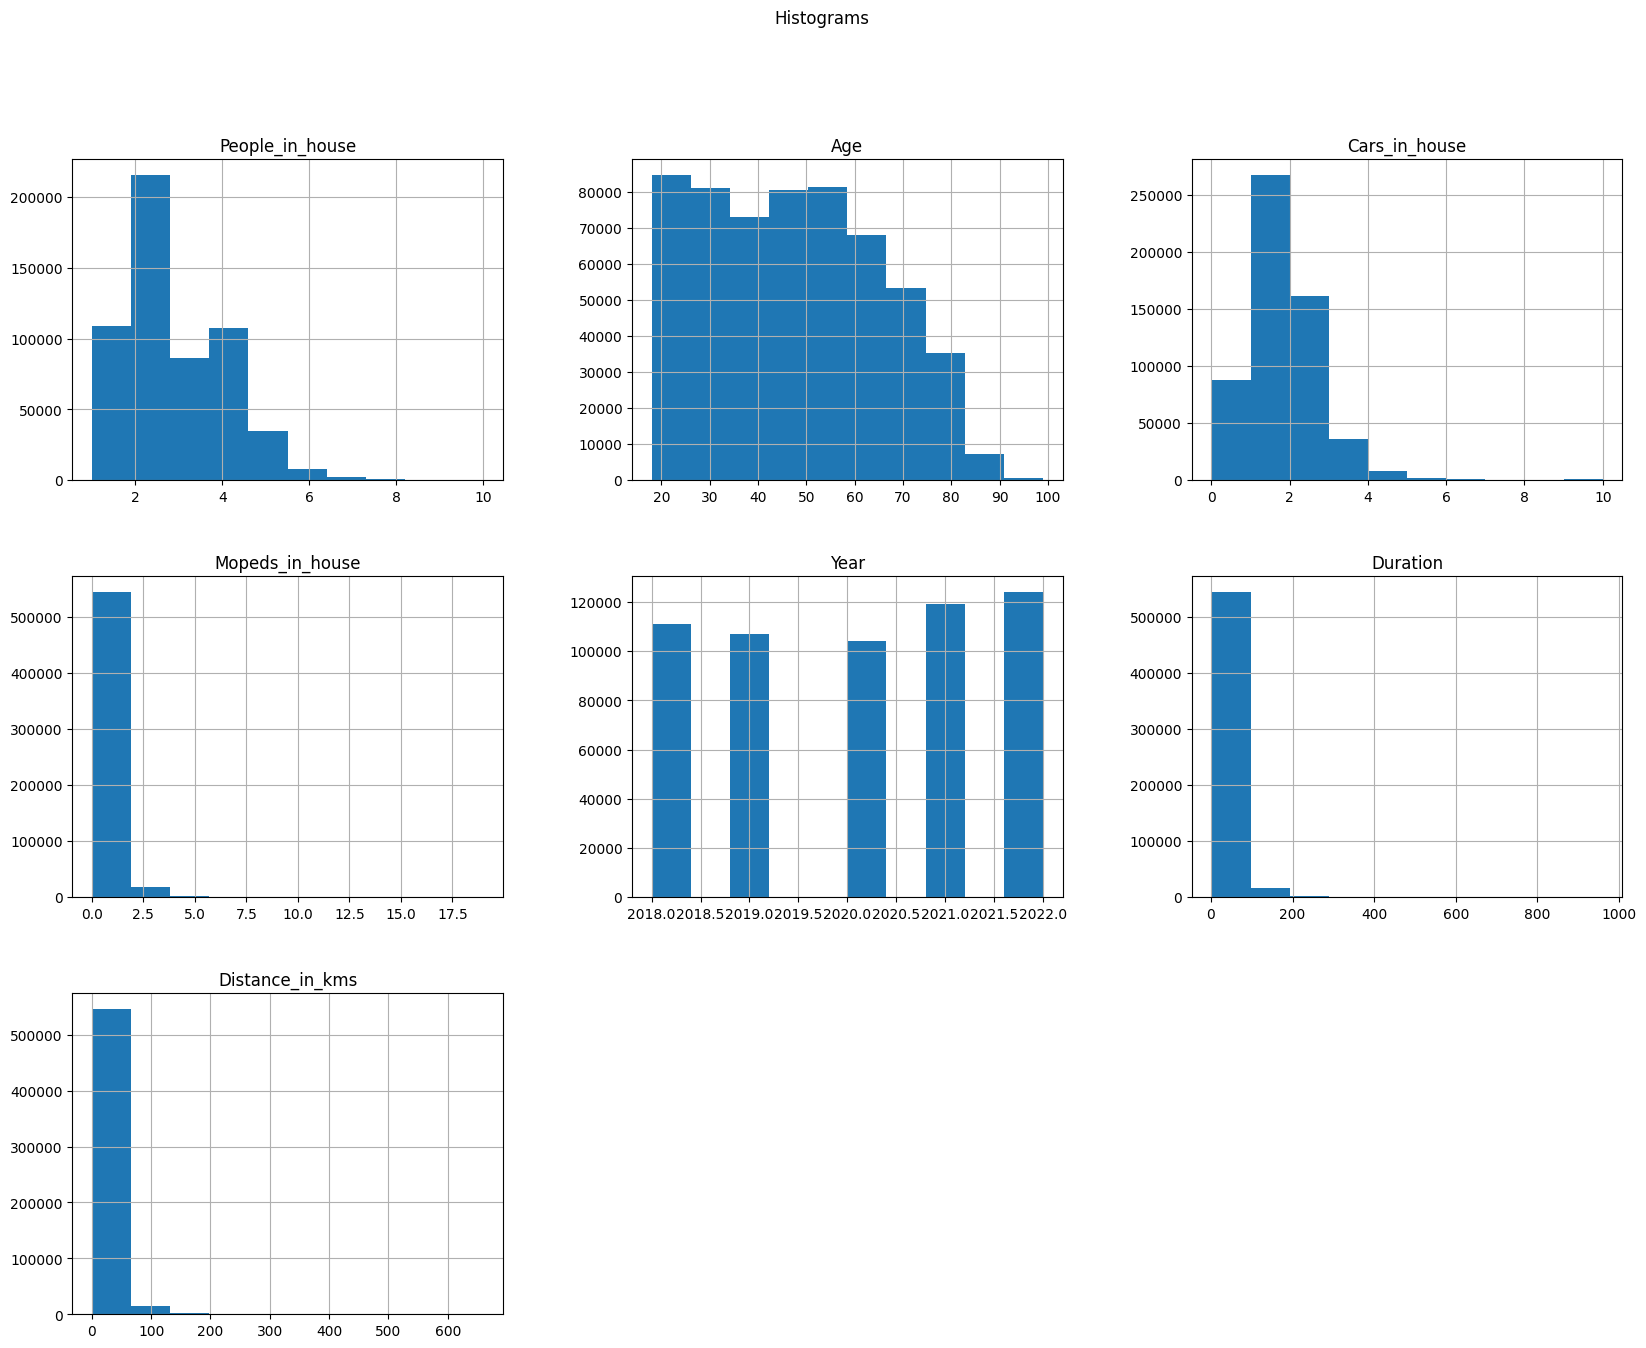

In [88]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We see that there are outliers in Mopeds, Distance and Duration. We will drop those samples

In [89]:
df = df[(df['Duration'] <= 200)]

In [90]:
df = df[(df['Distance_in_kms'] <= 150)]

In [91]:
df = df[(df['Mopeds_in_house'] <= 5)]

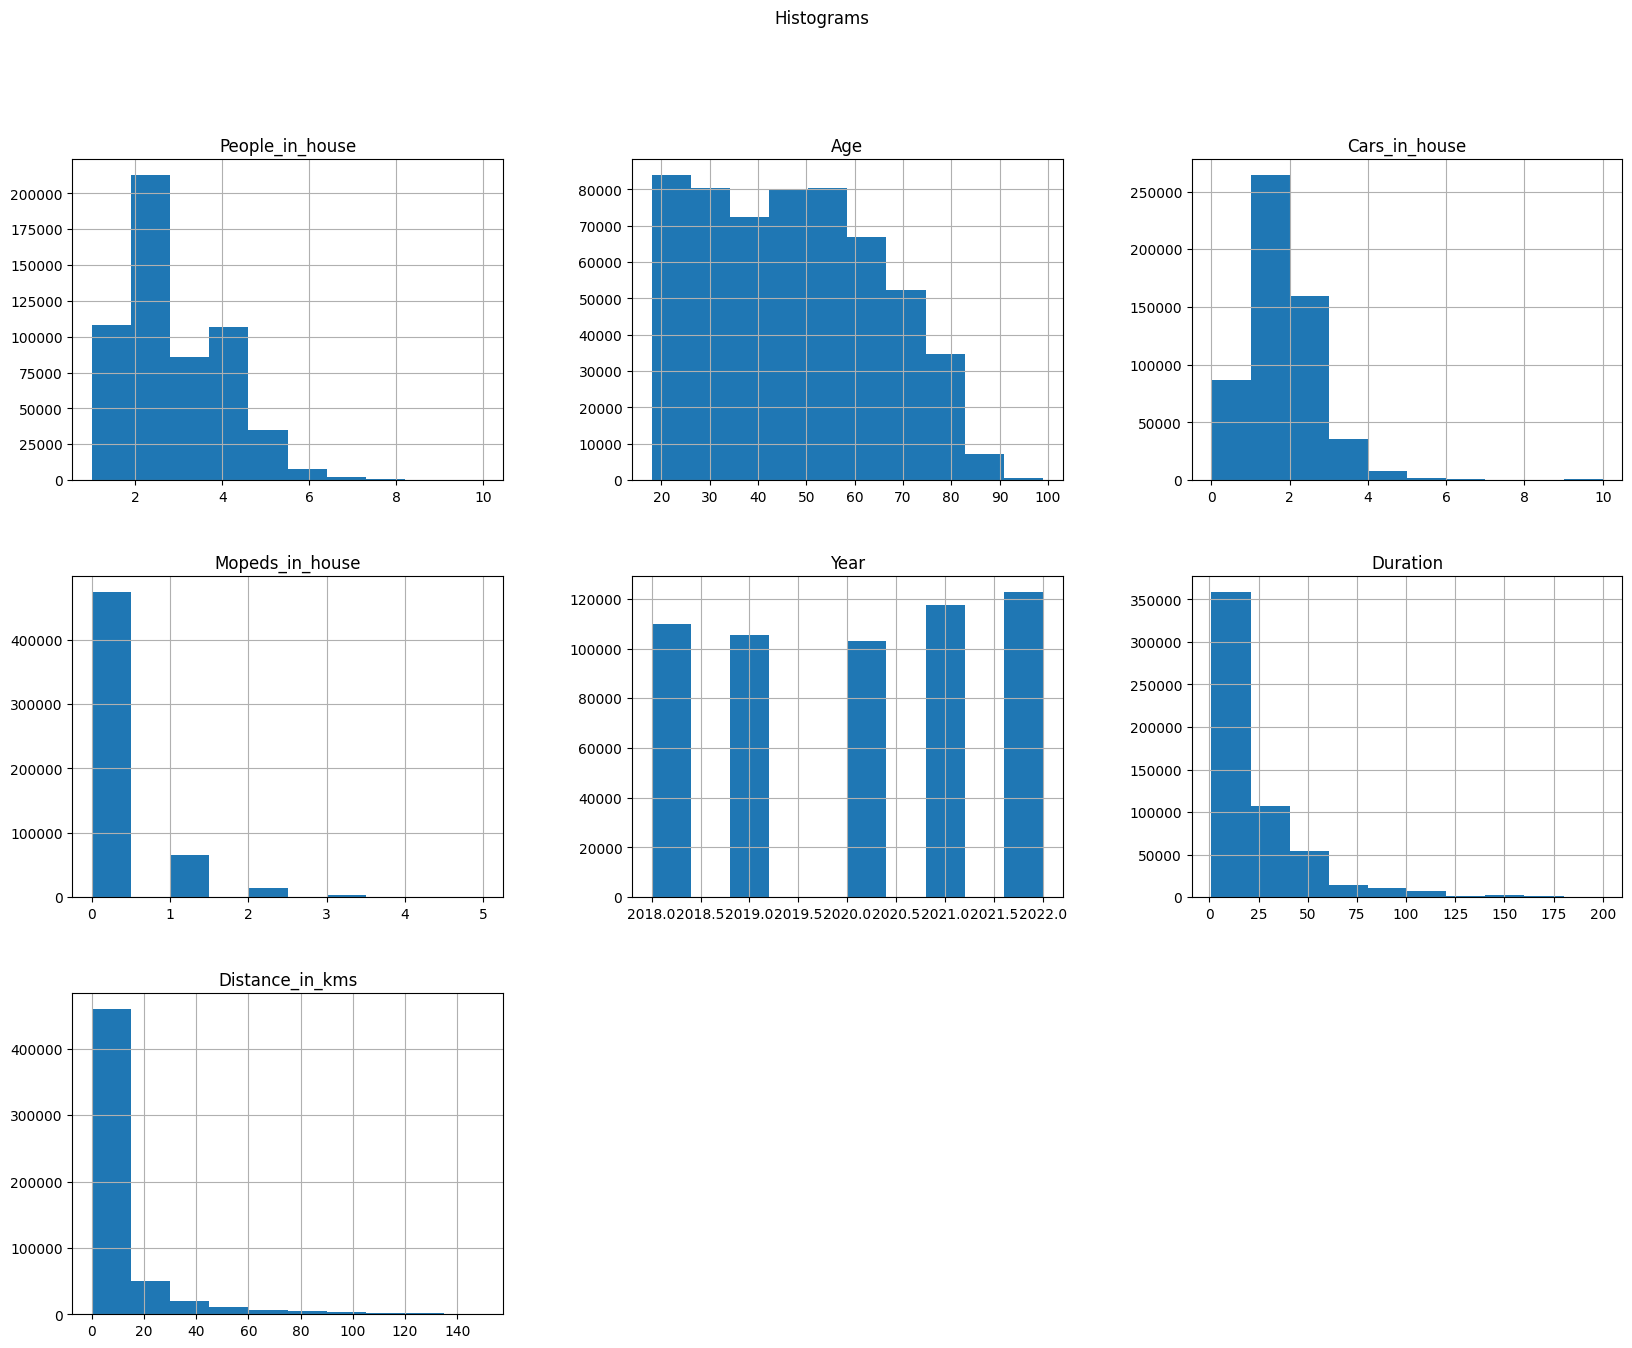

In [92]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [93]:
df.shape

(558811, 21)

In [94]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Distance_in_kms
count,558811.000000,558811.000000,558811.000000,558811.000000,558811.000000,558811.000000,558811.000000
mean,2.610564,47.227946,1.343132,0.197029,2020.068648,24.492369,10.447333
std,1.291767,17.740359,0.989407,0.531037,1.435297,25.687896,18.688444
min,1.000000,18.000000,0.000000,0.000000,2018.000000,1.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,2019.000000,10.000000,1.300000
50%,2.000000,47.000000,1.000000,0.000000,2020.000000,15.000000,3.500000
75%,4.000000,61.000000,2.000000,0.000000,2021.000000,30.000000,10.000000
max,10.000000,99.000000,10.000000,5.000000,2022.000000,200.000000,150.000000


# Explanatory Data Analysis

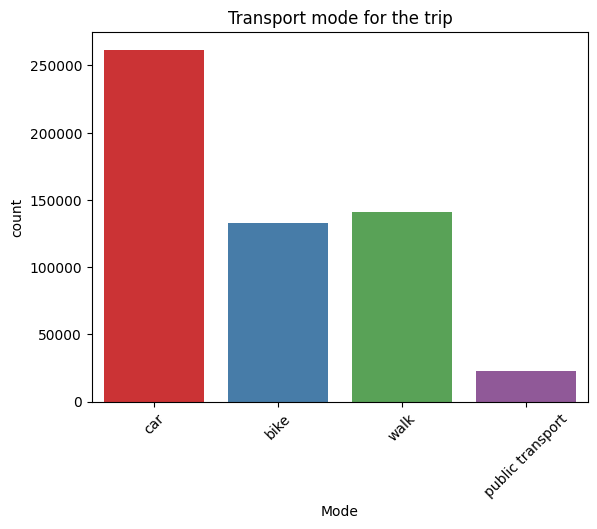

In [95]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Transport mode for the trip')
plt.show()

In [96]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car                 46.845892
walk                25.291199
bike                23.786575
public transport     4.076334
Name: proportion, dtype: float64


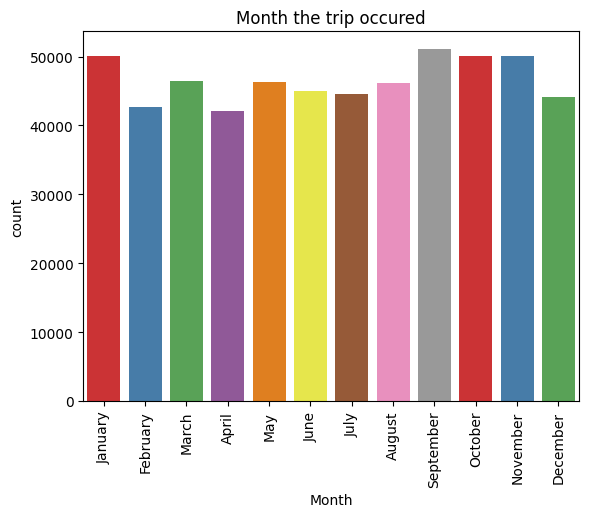

In [97]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

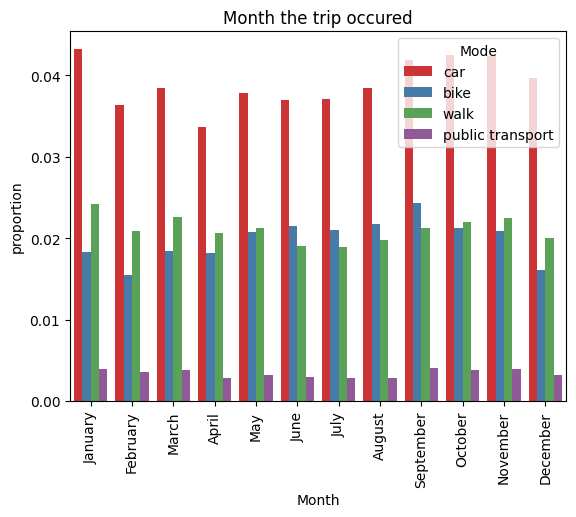

In [98]:
sns.countplot(x='Month', data=df, palette='Set1', hue='Mode', stat='proportion')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

In [99]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.143879
November     8.965106
January      8.958485
October      8.957769
March        8.324102
May          8.296723
August       8.268806
June         8.048159
July         7.979800
December     7.895693
February     7.630308
April        7.531169
Name: proportion, dtype: float64


In [100]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

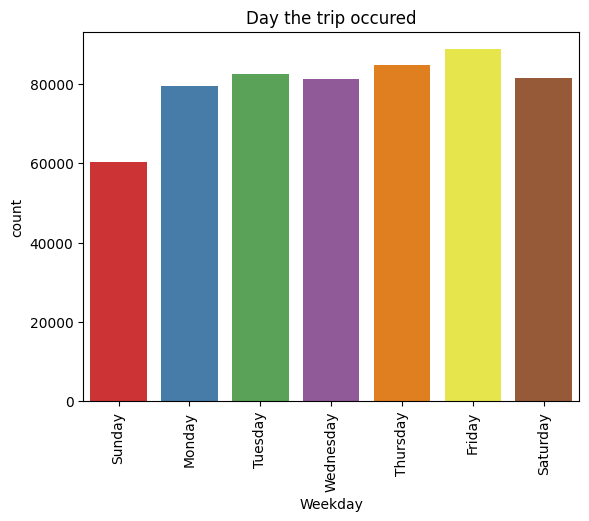

In [101]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

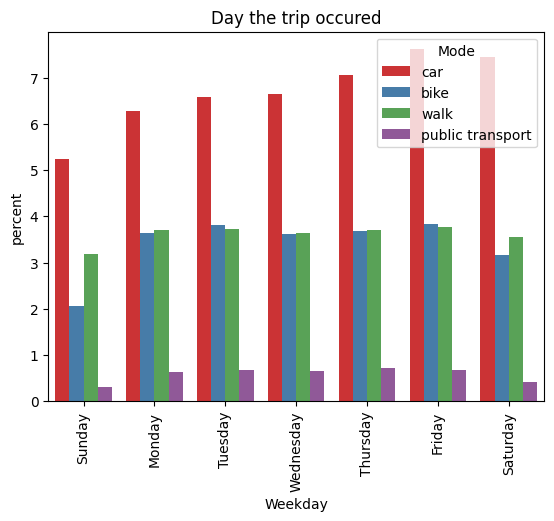

In [102]:
sns.countplot(x='Weekday', data=df, palette='Set1', hue='Mode', stat='percent', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

In [103]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.883904
Thursday     15.184025
Tuesday      14.781563
Saturday     14.568432
Wednesday    14.557158
Monday       14.242561
Sunday       10.782358
Name: proportion, dtype: float64


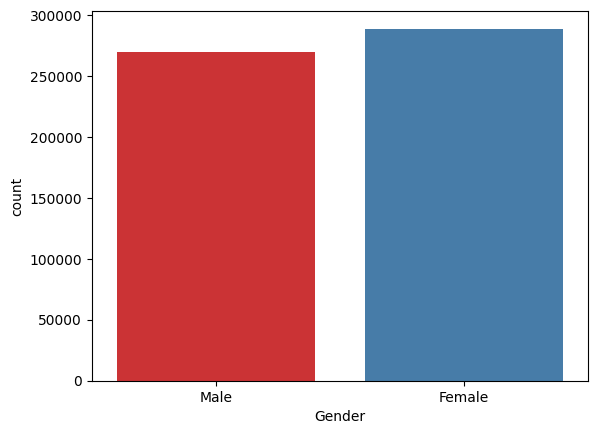

In [104]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [105]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.721423
Male      48.278577
Name: proportion, dtype: float64


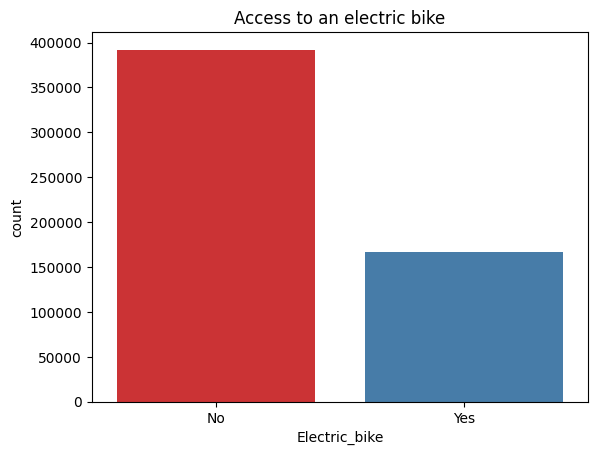

In [106]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.title('Access to an electric bike')
plt.show()

In [107]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     70.176858
Yes    29.823142
Name: proportion, dtype: float64


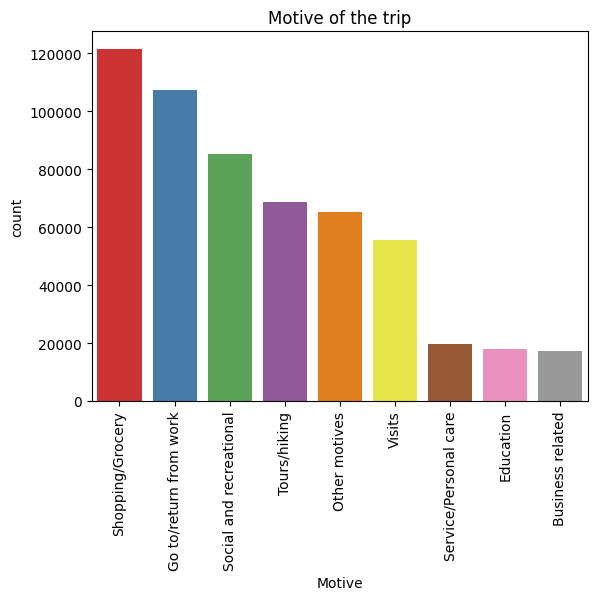

In [108]:
ordered_categories = df['Motive'].value_counts().index
sns.countplot(x='Motive', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Motive of the trip')
plt.show()

In [109]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.749751
Go to/return from work     19.233336
Social and recreational    15.238963
Tours/hiking               12.281791
Other motives              11.666556
Visits                      9.968129
Service/Personal care       3.520689
Education                   3.239199
Business related            3.101585
Name: proportion, dtype: float64


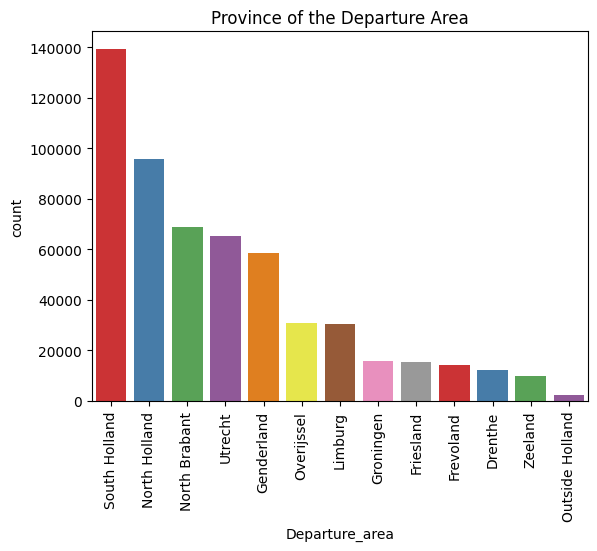

In [110]:
ordered_categories = df['Departure_area'].value_counts().index
sns.countplot(x='Departure_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Departure Area')
plt.show()

In [111]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.922917
North Holland      17.125289
North Brabant      12.315792
Utrecht            11.661188
Genderland         10.460424
Overijssel          5.525661
Limburg             5.462670
Groningen           2.849980
Friesland           2.777504
Frevoland           2.550952
Drenthe             2.197881
Zeeland             1.738871
Outside Holland     0.410872
Name: proportion, dtype: float64


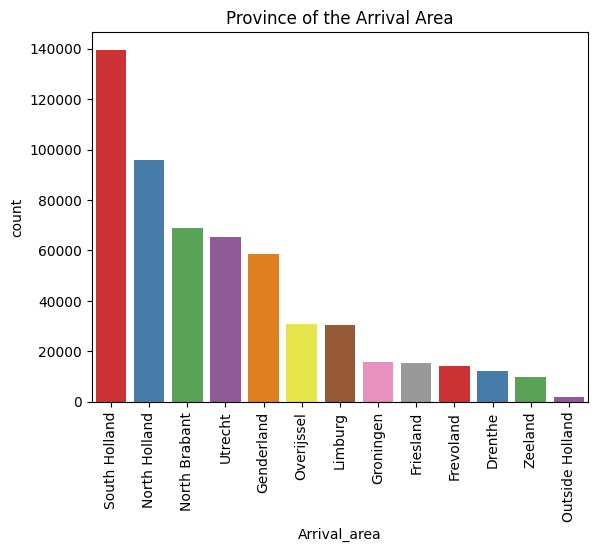

In [112]:
ordered_categories = df['Arrival_area'].value_counts().index
sns.countplot(x='Arrival_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Arrival Area')
plt.show()

In [113]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.970160
North Holland      17.120815
North Brabant      12.320445
Utrecht            11.682662
Genderland         10.465972
Overijssel          5.525124
Limburg             5.467323
Groningen           2.851948
Friesland           2.777504
Frevoland           2.542362
Drenthe             2.191618
Zeeland             1.732607
Outside Holland     0.351461
Name: proportion, dtype: float64


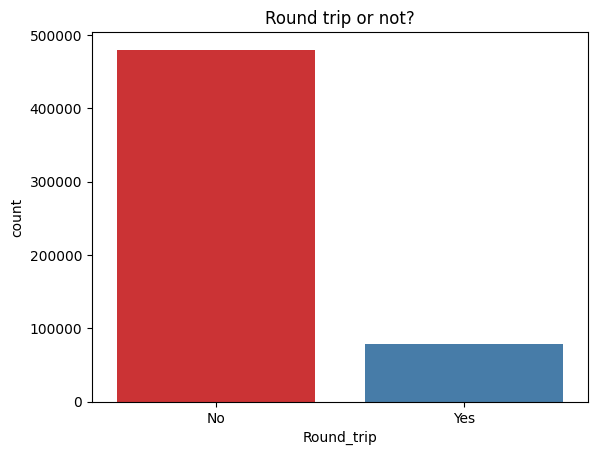

In [114]:
sns.countplot(x='Round_trip', data=df, palette='Set1')
plt.title('Round trip or not?')
plt.show()

In [115]:
perc=df['Round_trip'].value_counts(True)*100
print(perc)

Round_trip
No     85.897915
Yes    14.102085
Name: proportion, dtype: float64


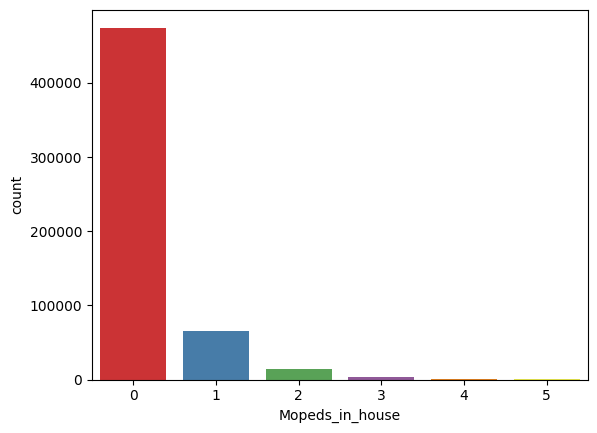

In [116]:
sns.countplot(x='Mopeds_in_house', data=df, palette='Set1')
plt.show()

In [117]:
perc=df['Mopeds_in_house'].value_counts(True)*100
print(perc)

Mopeds_in_house
0    84.910462
1    11.662798
2     2.563479
3     0.606108
4     0.190941
5     0.066212
Name: proportion, dtype: float64


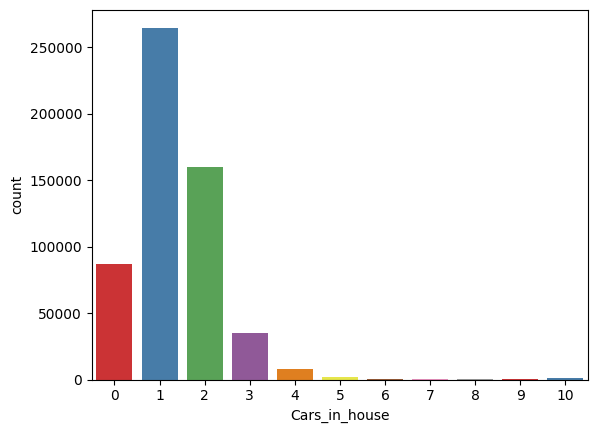

In [118]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [119]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1     47.370041
2     28.565830
0     15.519737
3      6.333984
4      1.485654
5      0.352355
10     0.180741
6      0.109518
7      0.040264
9      0.023801
8      0.018074
Name: proportion, dtype: float64


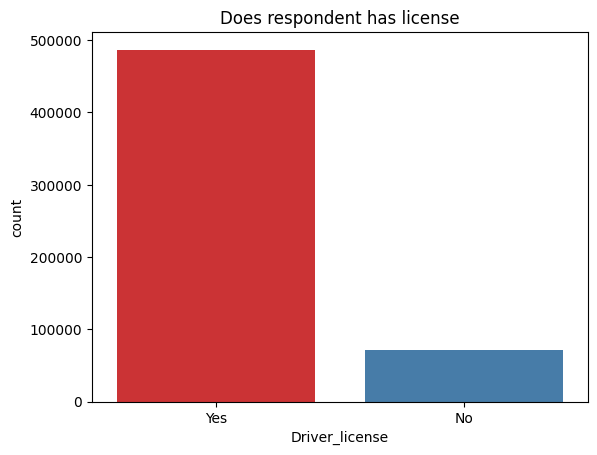

In [120]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.title('Does respondent has license')
plt.show()

In [121]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    87.128385
No     12.871615
Name: proportion, dtype: float64


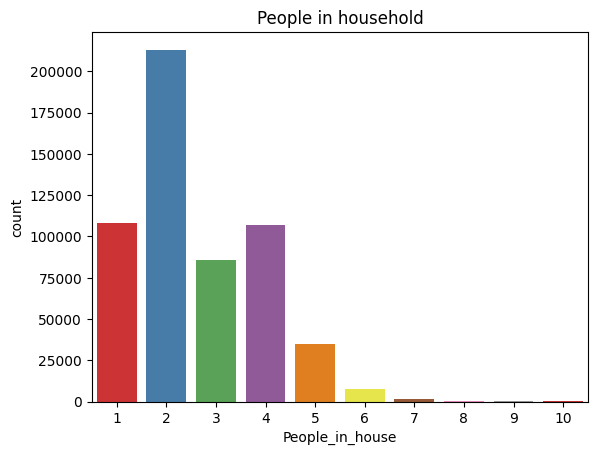

In [122]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.title('People in household')
plt.show()

In [123]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2     38.142234
1     19.336591
4     19.123460
3     15.318238
5      6.215518
6      1.380431
7      0.327660
8      0.093771
9      0.038117
10     0.023979
Name: proportion, dtype: float64


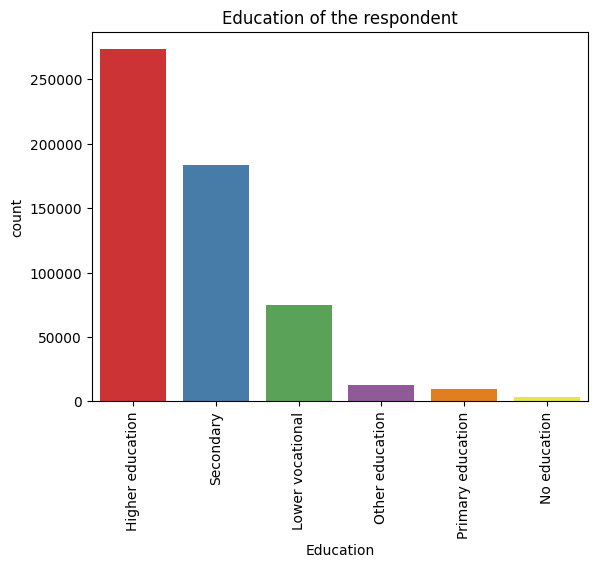

In [124]:
ordered_categories = df['Education'].value_counts().index
sns.countplot(x='Education', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Education of the respondent')
plt.show()

In [125]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.902939
Secondary            32.877663
Lower vocational     13.468955
Other education       2.344084
Primary education     1.748176
No education          0.658183
Name: proportion, dtype: float64


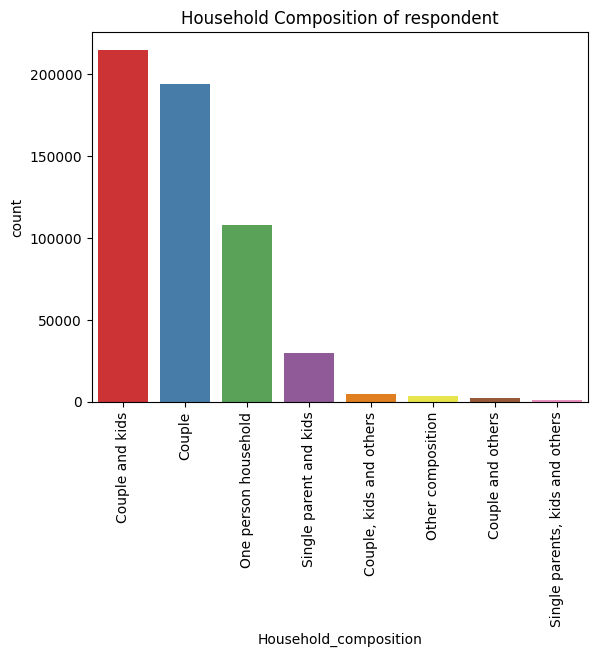

In [126]:
ordered_categories = df['Household_composition'].value_counts().index
sns.countplot(x='Household_composition', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Household Composition of respondent')
plt.show()

In [127]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids                    38.446988
Couple                             34.729810
One person household               19.336591
Single parent and kids              5.352436
Couple, kids and others             0.875609
Other composition                   0.595550
Couple and others                   0.470642
Single parents, kids and others     0.192373
Name: proportion, dtype: float64


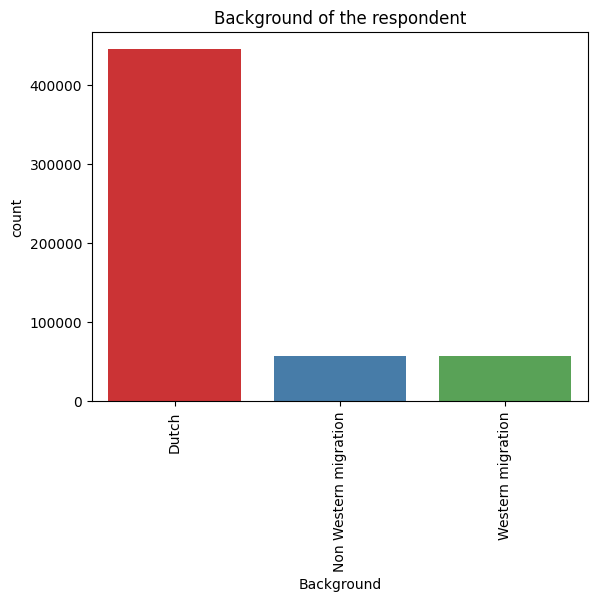

In [128]:
sns.countplot(x='Background', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Background of the respondent')
plt.show()

In [129]:
perc=df['Background'].value_counts(True)*100
print(perc)

Background
Dutch                    79.64267
Non Western migration    10.22224
Western migration        10.13509
Name: proportion, dtype: float64


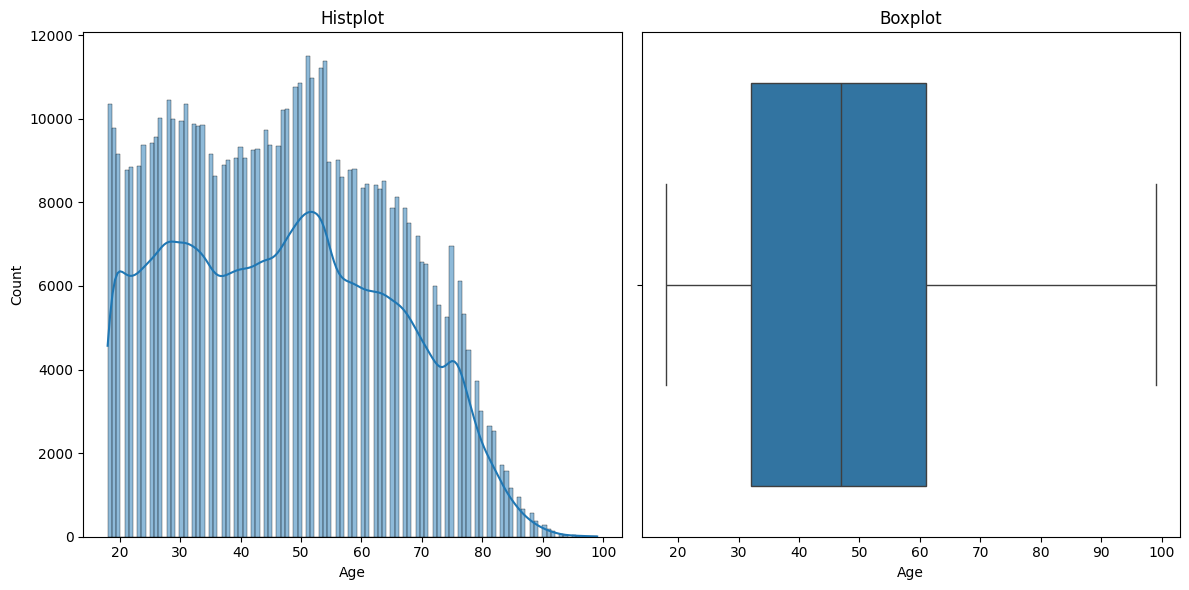

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

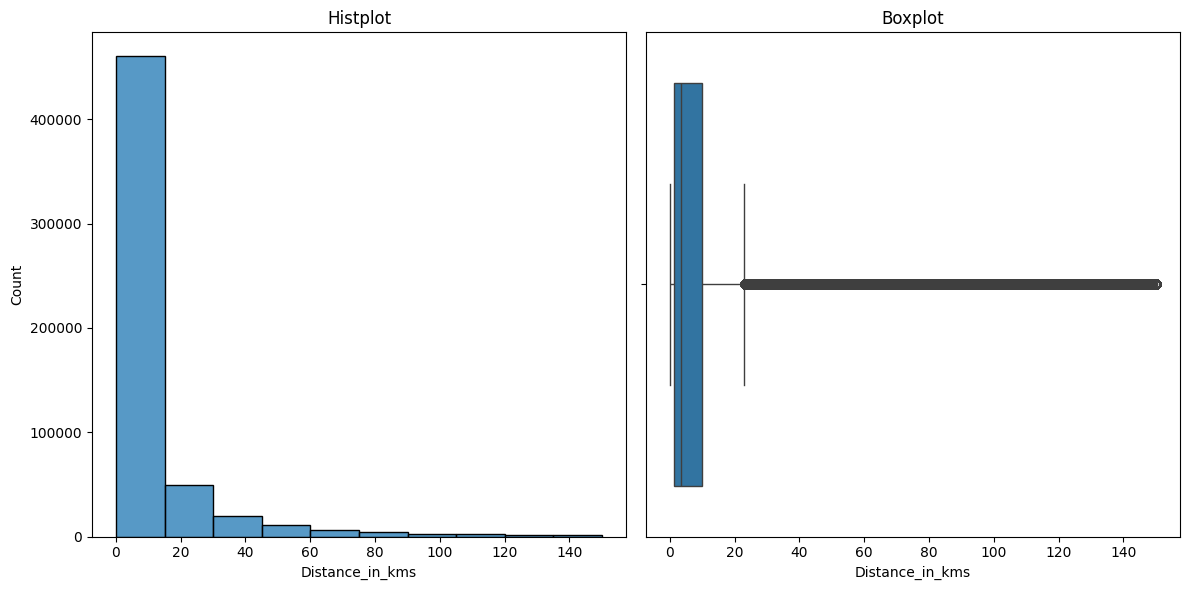

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

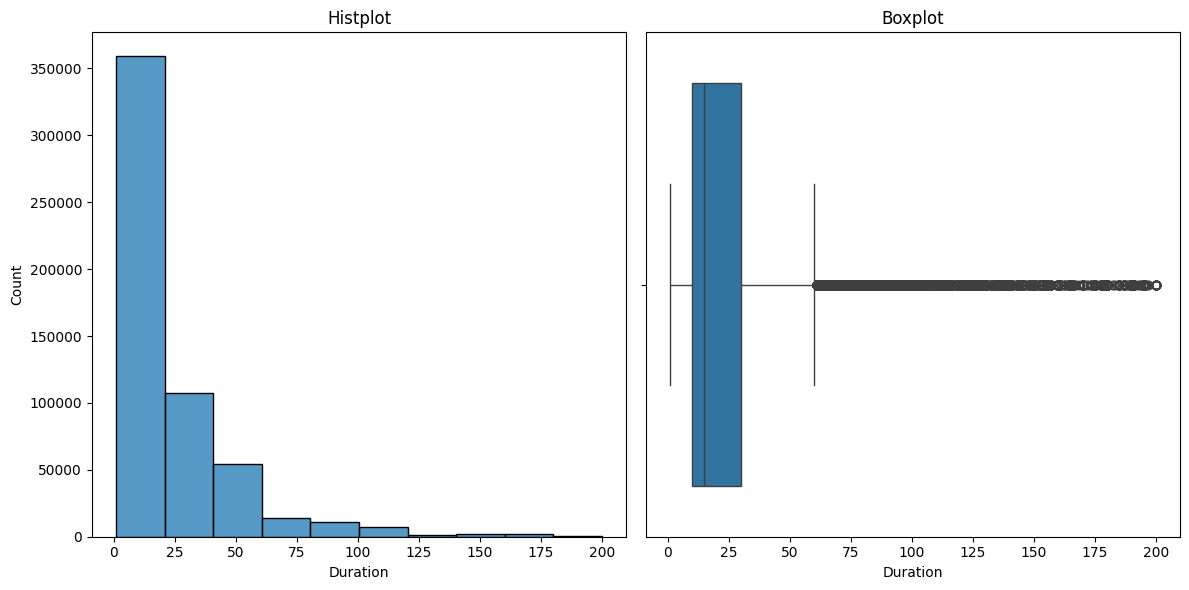

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

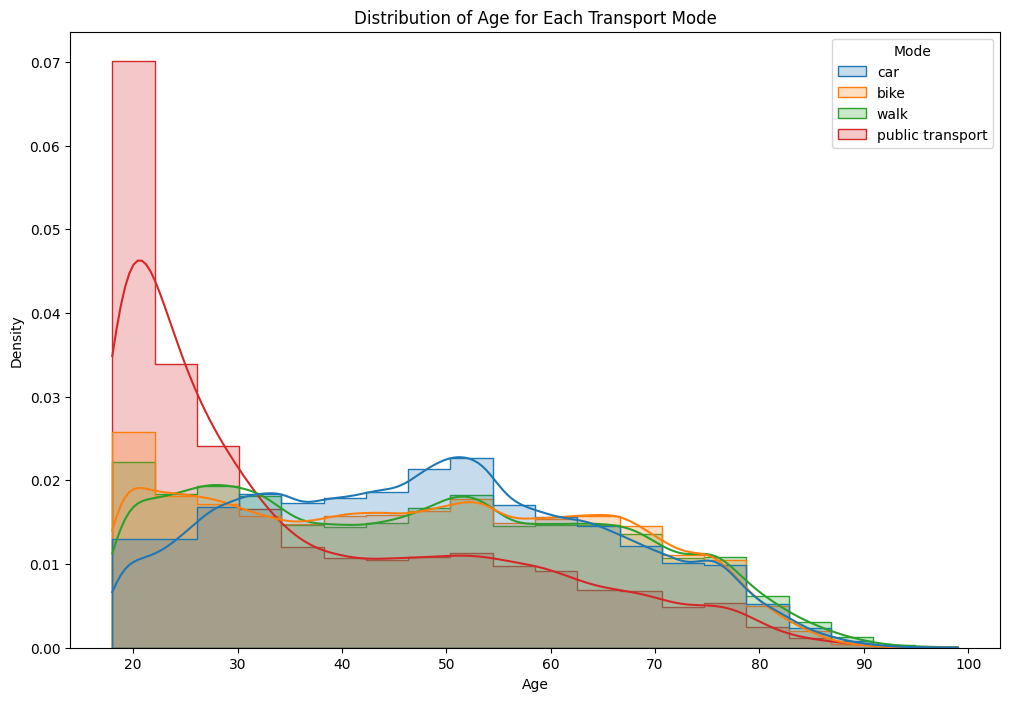

In [134]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age for Each Transport Mode')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

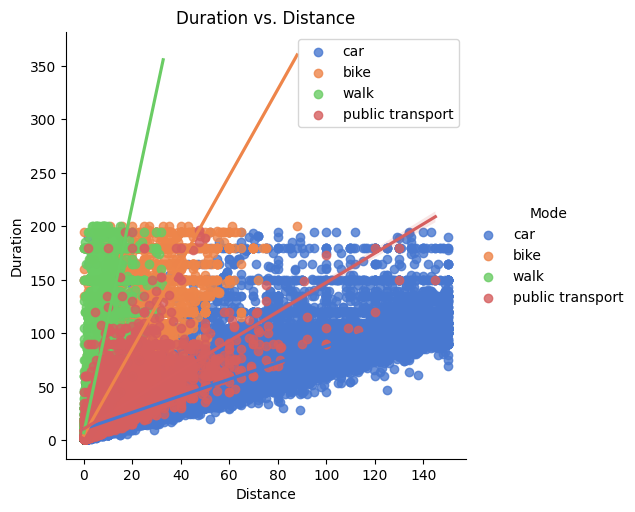

In [135]:
sns.lmplot(data=df, x='Distance_in_kms', y='Duration', hue='Mode', palette='muted')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Duration vs. Distance')
plt.legend()
plt.show()

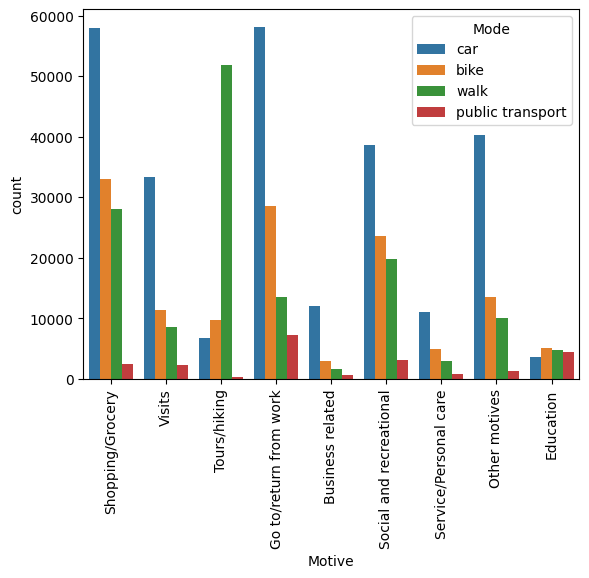

In [136]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

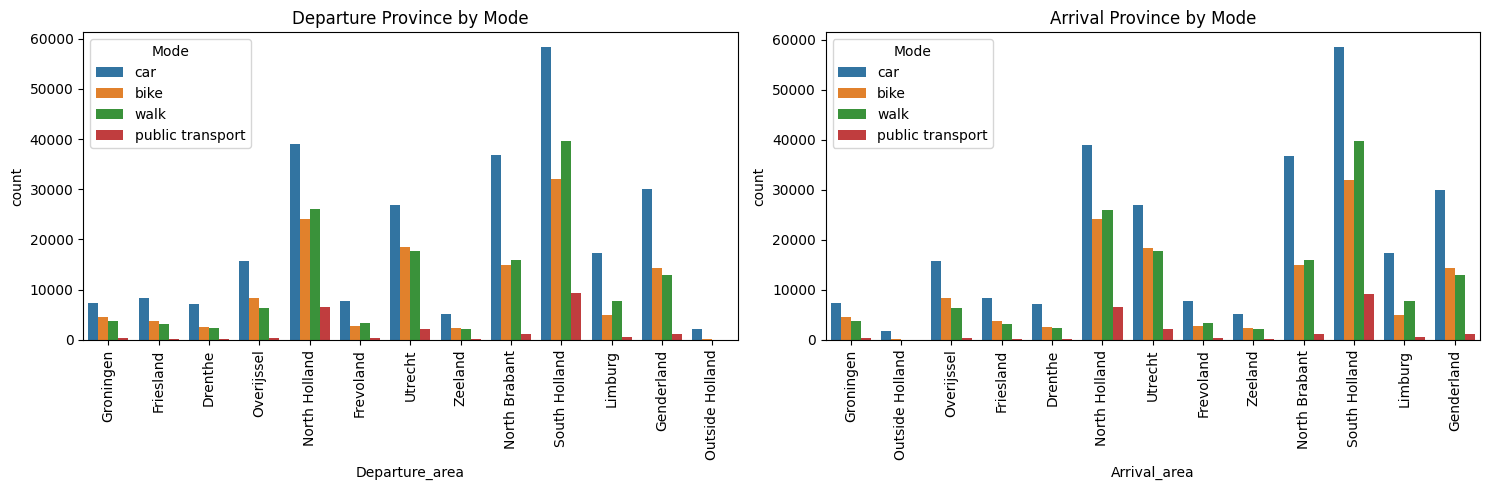

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

countplots = [
    (sns.countplot(x='Departure_area', data=df, hue="Mode", ax=axes[0]), 'Departure Province by Mode'),
    (sns.countplot(x='Arrival_area', data=df, hue="Mode", ax=axes[1]), 'Arrival Province by Mode'),
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

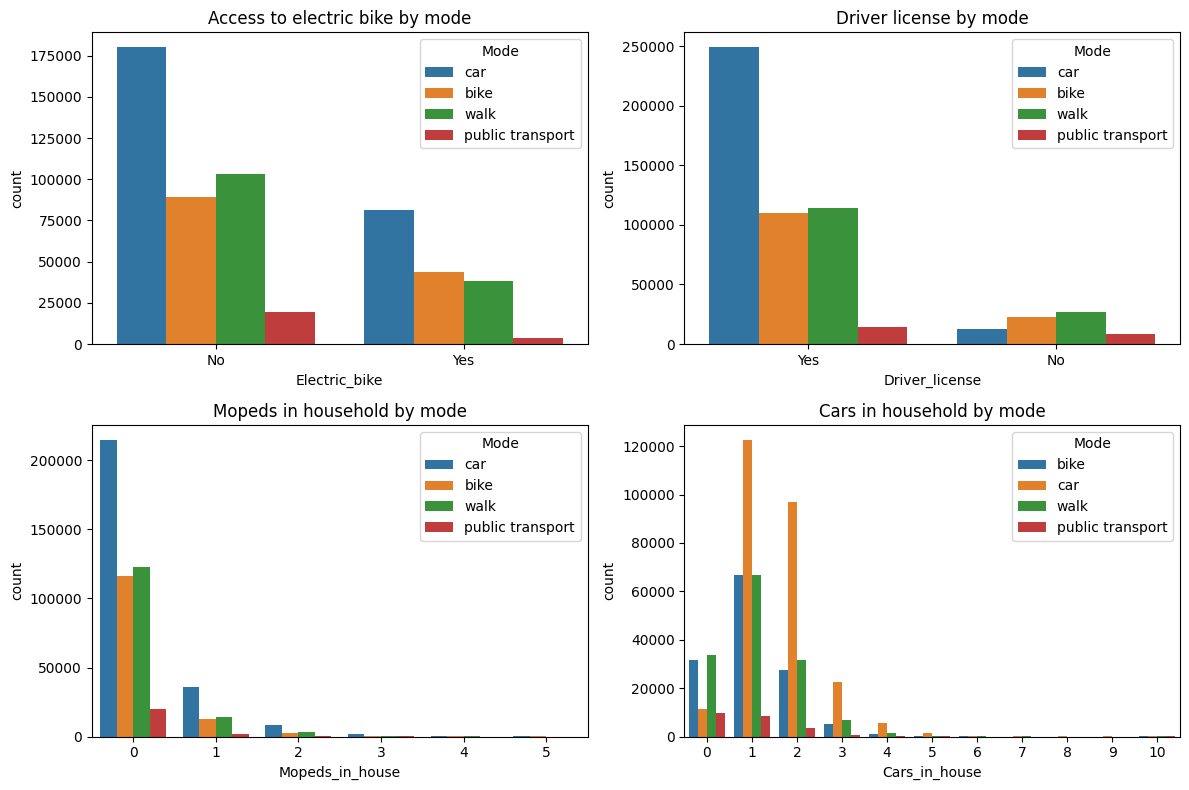

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Electric_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Driver_license', data=df, hue="Mode", ax=axes[0, 1]), 'Driver license by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

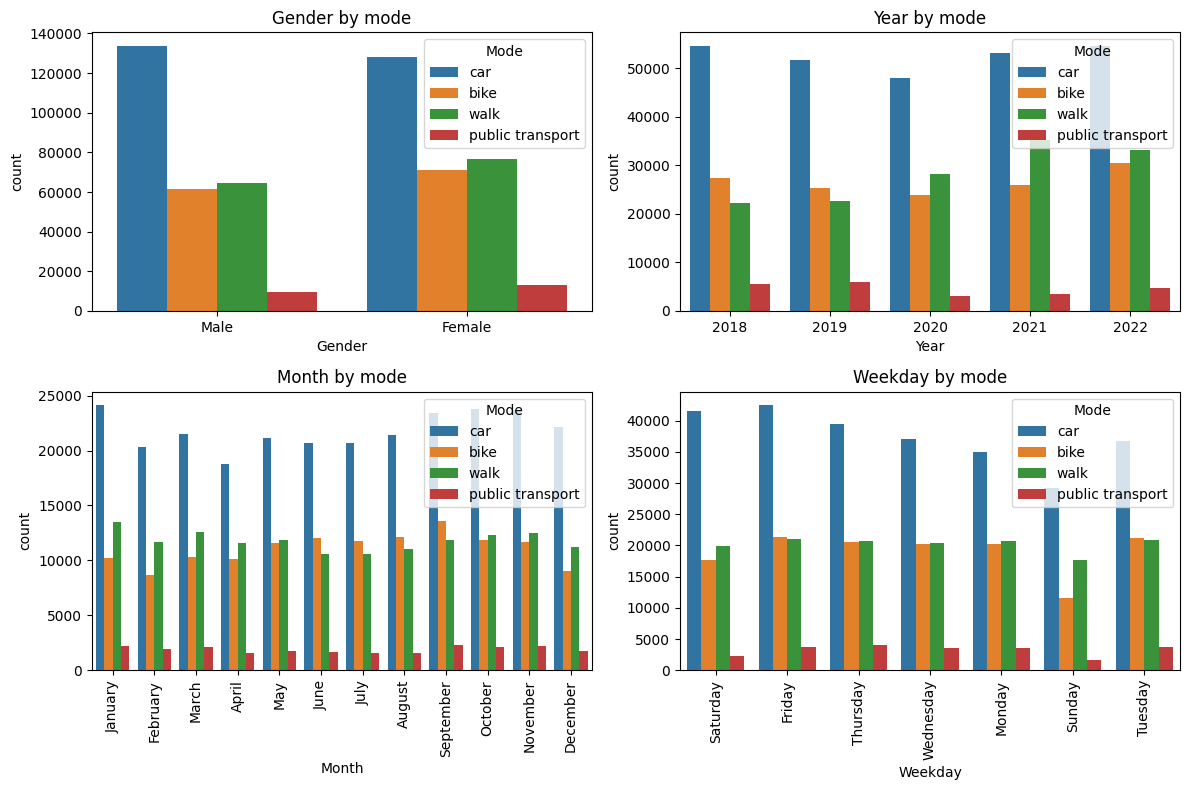

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Year', data=df, hue="Mode", ax=axes[0, 1]), 'Year by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

# DATA PREPROCESS

In [140]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Distance_in_kms
count,558811.000000,558811.000000,558811.000000,558811.000000,558811.000000,558811.000000,558811.000000
mean,2.610564,47.227946,1.343132,0.197029,2020.068648,24.492369,10.447333
std,1.291767,17.740359,0.989407,0.531037,1.435297,25.687896,18.688444
min,1.000000,18.000000,0.000000,0.000000,2018.000000,1.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,2019.000000,10.000000,1.300000
50%,2.000000,47.000000,1.000000,0.000000,2020.000000,15.000000,3.500000
75%,4.000000,61.000000,2.000000,0.000000,2021.000000,30.000000,10.000000
max,10.000000,99.000000,10.000000,5.000000,2022.000000,200.000000,150.000000


In [141]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids                    38.446988
Couple                             34.729810
One person household               19.336591
Single parent and kids              5.352436
Couple, kids and others             0.875609
Other composition                   0.595550
Couple and others                   0.470642
Single parents, kids and others     0.192373
Name: proportion, dtype: float64


In [142]:
value_mapping = {
                 "Single parent and kids":"Other",
                 "Couple, kids and others":"Other",
                 "Other composition":"Other",
                 "Couple and others":"Other",
                 "Single parents, kids and others":"Other"
                }
df['Household_composition'] = df['Household_composition'].replace(value_mapping)

In [143]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids         38.446988
Couple                  34.729810
One person household    19.336591
Other                    7.486610
Name: proportion, dtype: float64


In [144]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.922917
North Holland      17.125289
North Brabant      12.315792
Utrecht            11.661188
Genderland         10.460424
Overijssel          5.525661
Limburg             5.462670
Groningen           2.849980
Friesland           2.777504
Frevoland           2.550952
Drenthe             2.197881
Zeeland             1.738871
Outside Holland     0.410872
Name: proportion, dtype: float64


In [145]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Departure_area'] = df['Departure_area'].replace(value_mapping)

In [146]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland    24.922917
Other            23.514390
North Holland    17.125289
North Brabant    12.315792
Utrecht          11.661188
Genderland       10.460424
Name: proportion, dtype: float64


In [147]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.970160
North Holland      17.120815
North Brabant      12.320445
Utrecht            11.682662
Genderland         10.465972
Overijssel          5.525124
Limburg             5.467323
Groningen           2.851948
Friesland           2.777504
Frevoland           2.542362
Drenthe             2.191618
Zeeland             1.732607
Outside Holland     0.351461
Name: proportion, dtype: float64


In [148]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Arrival_area'] = df['Arrival_area'].replace(value_mapping)

In [149]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland    24.970160
Other            23.439947
North Holland    17.120815
North Brabant    12.320445
Utrecht          11.682662
Genderland       10.465972
Name: proportion, dtype: float64


In [150]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.902939
Secondary            32.877663
Lower vocational     13.468955
Other education       2.344084
Primary education     1.748176
No education          0.658183
Name: proportion, dtype: float64


In [151]:
value_mapping = {
                 "Other education":"Other",
                 "Primary education":"Other",
                 "No education":"Other",
                 "Lower vocational":"Other",
                }
df['Education'] = df['Education'].replace(value_mapping)

In [152]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    48.902939
Secondary           32.877663
Other               18.219398
Name: proportion, dtype: float64


In [153]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.749751
Go to/return from work     19.233336
Social and recreational    15.238963
Tours/hiking               12.281791
Other motives              11.666556
Visits                      9.968129
Service/Personal care       3.520689
Education                   3.239199
Business related            3.101585
Name: proportion, dtype: float64


In [154]:
value_mapping = {
                 "Service/Personal care":"Service/Care/Business",
                 "Education":"Service/Care/Business",
                 "Business related":"Service/Care/Business",
                }
df['Motive'] = df['Motive'].replace(value_mapping)

In [155]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.749751
Go to/return from work     19.233336
Social and recreational    15.238963
Tours/hiking               12.281791
Other motives              11.666556
Visits                      9.968129
Service/Care/Business       9.861474
Name: proportion, dtype: float64


In [156]:
one_hot_encoded = pd.get_dummies(df[['Departure_area', 'Background', 'Motive', 'Household_composition', 'Education']])

one_hot_encoded = one_hot_encoded.astype(int)

df = pd.concat([df, one_hot_encoded], axis=1)

df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,0,0,0,1,0,0,0,1
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,0,0,0,1,0,0,0,1
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,1,0,0,1,0,0,0,1
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,0,1,0,0,0,0,0,1
6,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817120,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,0,0,0,0,0,0,1,1,0,0
817121,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,0,0,0,0,0,0,1,1,0,0
817122,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,0,0,0,0,0,0,1,1,0,0
817123,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,0,0,0,0,0,0,1,1,0,0


In [157]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Round_trip", "Arrival_area", "Holiday",]
for col in features:
    df[col]=le.fit_transform(df[col])

In [158]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [159]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [160]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [161]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,2,Couple,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
6,2,Couple,1,42,Dutch,Secondary,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817120,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
817121,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
817122,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
817123,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [162]:
df.isnull().any()

People_in_house                               False
Household_composition                         False
Gender                                        False
Age                                           False
Background                                    False
Education                                     False
Driver_license                                False
Cars_in_house                                 False
Mopeds_in_house                               False
Electric_bike                                 False
Year                                          False
Month                                         False
Weekday                                       False
Holiday                                       False
Round_trip                                    False
Motive                                        False
Departure_area                                False
Arrival_area                                  False
Duration                                      False
Mode        

In [163]:
drops = ['Departure_area', 'Background', 'Motive', 'Household_composition', 'Education']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,0,0,0,1
6,2,1,42,1,1,0,0,2018,1,5,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817120,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
817121,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
817122,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
817123,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
